**Compare Pollution Levels (SQL + EDA)**

https://cloud.google.com/bigquery/public-data/openaq

*Step 1: Load Data*

In [1]:
import bq_helper
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
open_aq = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="openaq")
# Delete Outliers

Using Kaggle's public dataset BigQuery integration.


*Step 2: Compare Average Pollution Levels Per Country*

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


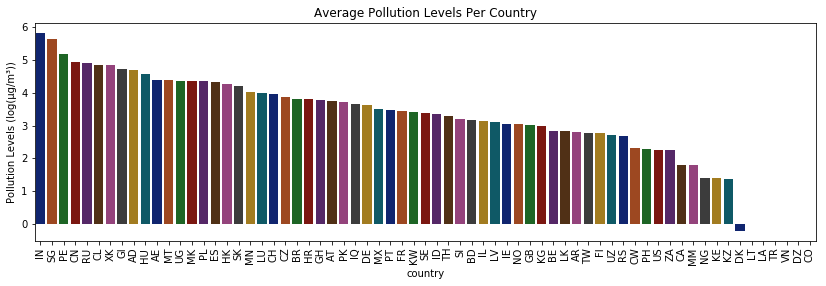

In [2]:
query2 = """SELECT AVG(value) as `Average`,country
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE unit = 'µg/m³'
            AND country != 'AU'
            AND country != 'NL'
            AND country != 'NP'
            AND country != 'ET'
            AND country != 'IT'
            AND country != 'BA'            
            GROUP BY country
            ORDER BY Average DESC
            """
avgPC = open_aq.query_to_pandas(query2)
plt.figure(figsize=(14,4))
sns.barplot(avgPC['country'],np.log(avgPC['Average']), palette= sns.color_palette('dark'))
plt.xticks(rotation=90)
plt.title('Average Pollution Levels Per Country')
plt.ylabel('Pollution Levels (log(µg/m³))');

*Step 3: Compare Average Pollution Levels Per Year*

Text(0.5, 1.0, 'Average Pollution Levels Per Year (µg/m³)')

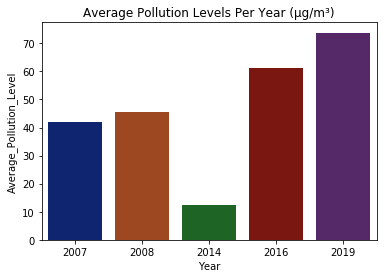

In [3]:
query3 = """SELECT EXTRACT(YEAR FROM timestamp) as `Year`,
            AVG(value) as `Average_Pollution_Level`
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE unit = 'µg/m³'
            AND EXTRACT (YEAR FROM timestamp) != 2018
            AND EXTRACT (YEAR FROM timestamp) != 2017
            AND EXTRACT (YEAR FROM timestamp) != 2015
            GROUP BY EXTRACT(YEAR FROM timestamp)
            """
avgPY = open_aq.query_to_pandas(query3)
graph = sns.barplot(avgPY['Year'],avgPY['Average_Pollution_Level'],palette= sns.color_palette('dark'))
graph.set_title('Average Pollution Levels Per Year (µg/m³)')

*Step 4: Compare Average NO2 Levels Per Country*

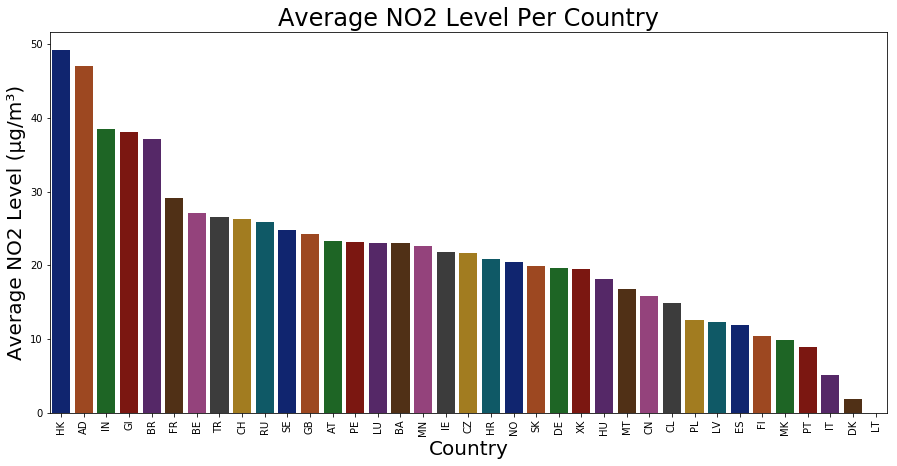

In [4]:
QUERY4 = """
    SELECT
        country, 
        avg(value) as avg_value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'no2'
      AND unit = 'µg/m³'
      AND country != 'NL'
      AND country != 'RS'
    GROUP BY country
    ORDER BY avg_value DESC
        """

avgN = open_aq.query_to_pandas_safe(QUERY4)
plt.subplots(figsize=(15,7))
sns.barplot(x='country',y='avg_value',data=avgN,palette='dark')
plt.ylabel('Average NO2 Level (µg/m³)', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=20)
plt.title('Average NO2 Level Per Country', fontsize=24)
plt.show()

*Step 5: Compare Average SO2 Levels Per Country*

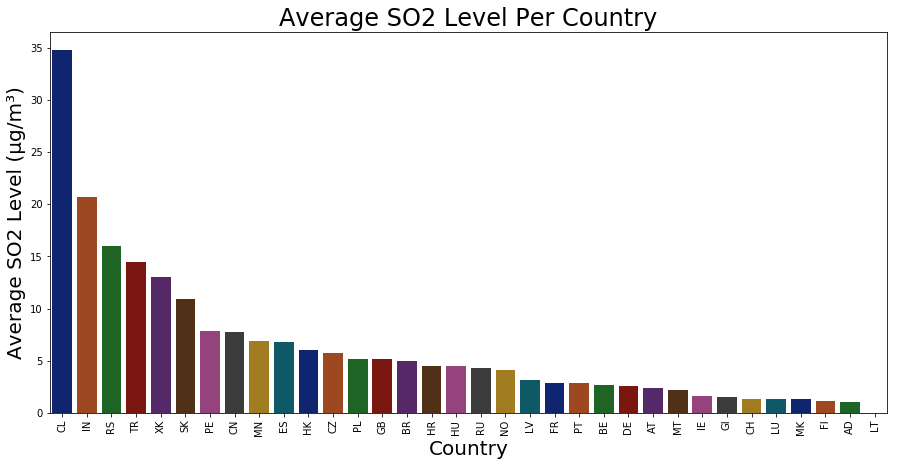

In [5]:
QUERY5 = """
    SELECT
        country, 
        avg(value) as avg_value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'so2'
      AND unit = 'µg/m³'
      AND country != 'NL'
      AND country != 'IT'
      AND country != 'DK'
      AND country != 'BA'
    GROUP BY country
    ORDER BY avg_value DESC
        """

avgS = open_aq.query_to_pandas_safe(QUERY5)
plt.subplots(figsize=(15,7))
sns.barplot(x='country',y='avg_value',data=avgS,palette='dark')
plt.ylabel('Average SO2 Level (µg/m³)', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=20)
plt.title('Average SO2 Level Per Country', fontsize=24)
plt.show()

*Step 6: Compare Average Carbon Monoxide Levels Per Country*

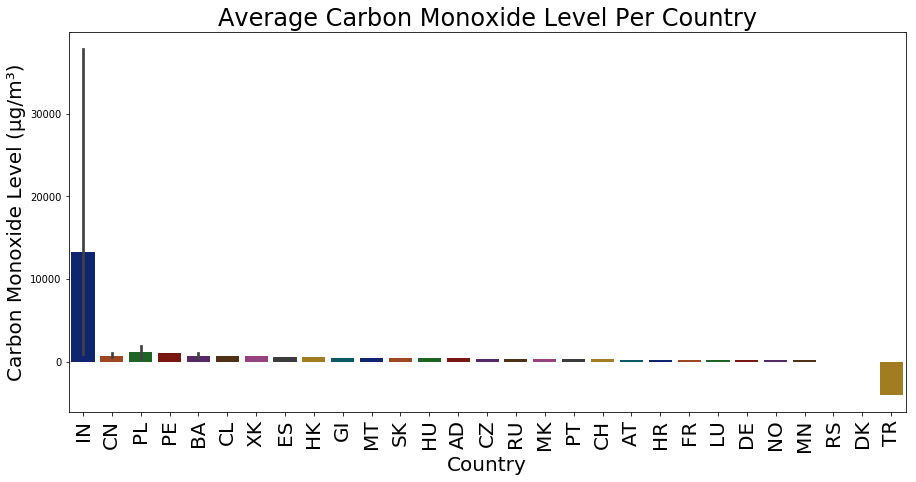

In [6]:
query6 = """
    SELECT country, 
           avg(value) as Avg_Value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'co'
      AND unit = 'µg/m³'
      AND country != 'IT'
      AND country != 'LT'
      AND country != 'IE'
      AND country != 'LV'
      AND country != 'BE'
      AND country != 'NL'
      GROUP BY country, source_name
      ORDER BY Avg_Value DESC
        """
avgC = open_aq.query_to_pandas_safe(query6)
plt.subplots(figsize=(15,7))
sns.barplot(x='country',y='Avg_Value',data=avgC,palette='dark')
plt.ylabel('Carbon Monoxide Level (µg/m³)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average Carbon Monoxide Level Per Country', fontsize=24)
plt.savefig('avg_co.png')
plt.show()

*Step 7: Compare Average Ozone Levels Per Country*

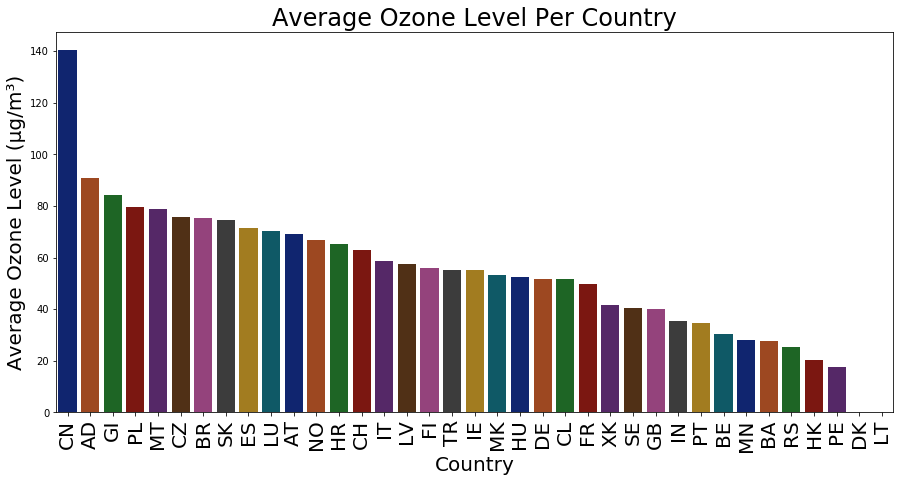

In [7]:
QUERY7 = """
    SELECT
        country, 
        avg(value) as avg_value
    FROM
      `bigquery-public-data.openaq.global_air_quality`
    WHERE
      pollutant = 'o3'
      AND unit = 'µg/m³'
      AND country != 'NL'
    GROUP BY country
    ORDER BY avg_value DESC
        """
avgO = open_aq.query_to_pandas_safe(QUERY7)
plt.subplots(figsize=(15,7))
sns.barplot(x='country',y='avg_value',data=avgO,palette='dark')
plt.ylabel('Average Ozone Level (µg/m³)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.title('Average Ozone Level Per Country', fontsize=24)
plt.show()

*Step 8: Average Pollution Levels Per Country Mapped*

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


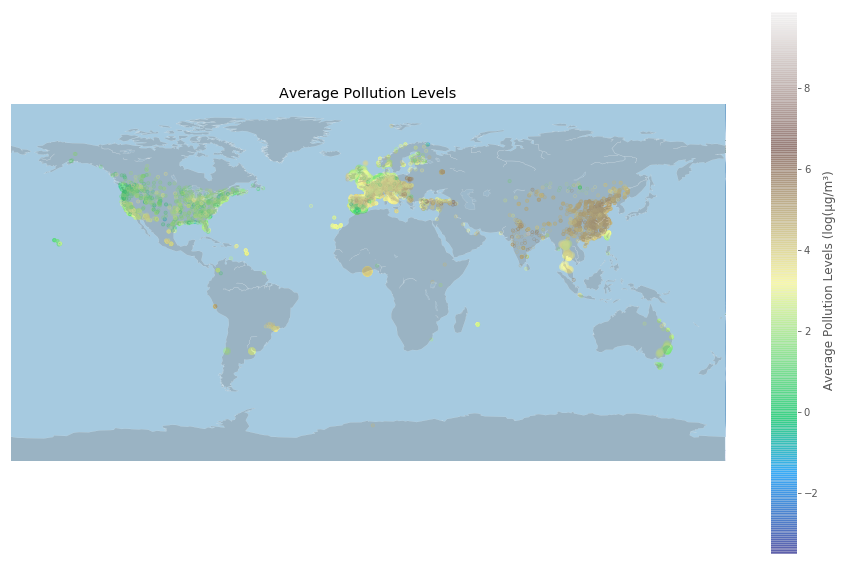

In [8]:
# Adapted from https://www.kaggle.com/sudhirnl7/air-quality-eda-using-sql-bigquery
query7 = """SELECT city,latitude,longitude,averaged_over_in_hours,
            AVG(value) as `Average`
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE unit = 'µg/m³'
            GROUP BY latitude,city,longitude,averaged_over_in_hours   
            """
pollutionMap = open_aq.query_to_pandas_safe(query7)
pollutionMap.dropna(axis=0, inplace=True)
plt.style.use('ggplot')
f,ax = plt.subplots(figsize=(16,10))
m1 = Basemap(projection='cyl', llcrnrlon=-180, urcrnrlon=180, llcrnrlat=-90, urcrnrlat=90,
            resolution='c',lat_ts=True)
m1.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m1.fillcontinents(color='grey', alpha=0.3)
m1.drawcoastlines(linewidth=0.1, color="white")
m1.shadedrelief()
hour = pollutionMap['averaged_over_in_hours']
avg = np.log(pollutionMap['Average'])
m1loc = m1(pollutionMap['latitude'].tolist(),pollutionMap['longitude'])
m1.scatter(m1loc[1],m1loc[0],lw=3,alpha=0.5,cmap='terrain',
          c=avg,s=hour)
plt.title('Average Pollution Levels')
plt.colorbar(label=' Average Pollution Levels (log(µg/m³)');